In [51]:
import pandas as pd
import sqlite3

In [52]:
connect = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [53]:
query = """
SELECT datetime AS date FROM pageviews WHERE uid LIKE 'user_%'
"""

In [54]:
pageviews = pd.read_sql(query, connect, parse_dates=['date'])
daily_views = pageviews['date'].dt.date.value_counts().sort_index()
daily_views

date
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: count, dtype: int64

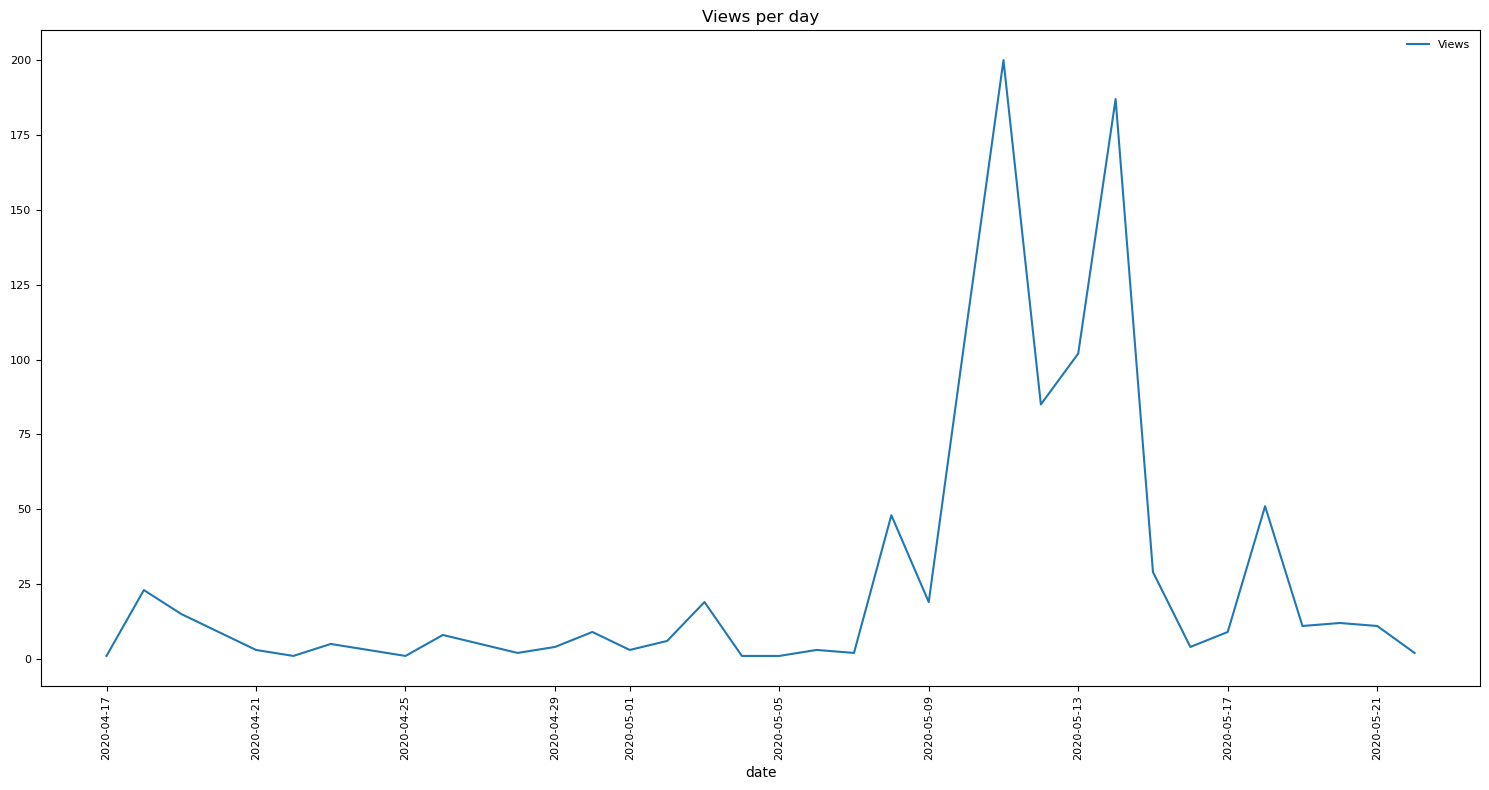

In [55]:
plot_params = {
    'kind': 'line',
    'figsize': (15, 8),
    'title': 'Views per day',
    'fontsize': 8,
    'rot': 90,
    'label': 'Views'
}

ax = daily_views.plot(**plot_params)
ax.legend(loc='upper right', fontsize=8, frameon=False)
ax.figure.tight_layout()

In [56]:
connect.close()